# ***BRAIN TUMOR SEGMENTATION USING CONVOLUTIONAL NEURAL NETWORK***
> *Brain Tumor is a disease which affects many people in the developing countries. While treatment is possible, it requires an accurate diagnosis first. In these countries projects there are in many cases available X-ray machines (through low-cost projects and donations), but often the radiological expertise is missing for accurately assessing the images.*

* ***Our Job is to build an algorith to classify the x-rays of brain tumor images***

## ***LOADING AND VISUALIZING THE DATA***

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

100% 148M/149M [00:06<00:00, 25.1MB/s]
100% 149M/149M [00:06<00:00, 22.6MB/s]


*We have got the zip file, now let's extract it*

In [3]:
# Extracting the file
import zipfile

zip_ref = zipfile.ZipFile("/content/brain-tumor-mri-dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls Training

glioma	meningioma  notumor  pituitary


In [5]:
!ls Training/glioma

Tr-gl_0010.jpg	Tr-gl_0341.jpg	Tr-gl_0672.jpg	Tr-gl_1003.jpg
Tr-gl_0011.jpg	Tr-gl_0342.jpg	Tr-gl_0673.jpg	Tr-gl_1004.jpg
Tr-gl_0012.jpg	Tr-gl_0343.jpg	Tr-gl_0674.jpg	Tr-gl_1005.jpg
Tr-gl_0013.jpg	Tr-gl_0344.jpg	Tr-gl_0675.jpg	Tr-gl_1006.jpg
Tr-gl_0014.jpg	Tr-gl_0345.jpg	Tr-gl_0676.jpg	Tr-gl_1007.jpg
Tr-gl_0015.jpg	Tr-gl_0346.jpg	Tr-gl_0677.jpg	Tr-gl_1008.jpg
Tr-gl_0016.jpg	Tr-gl_0347.jpg	Tr-gl_0678.jpg	Tr-gl_1009.jpg
Tr-gl_0017.jpg	Tr-gl_0348.jpg	Tr-gl_0679.jpg	Tr-gl_1010.jpg
Tr-gl_0018.jpg	Tr-gl_0349.jpg	Tr-gl_0680.jpg	Tr-gl_1011.jpg
Tr-gl_0019.jpg	Tr-gl_0350.jpg	Tr-gl_0681.jpg	Tr-gl_1012.jpg
Tr-gl_0020.jpg	Tr-gl_0351.jpg	Tr-gl_0682.jpg	Tr-gl_1013.jpg
Tr-gl_0021.jpg	Tr-gl_0352.jpg	Tr-gl_0683.jpg	Tr-gl_1014.jpg
Tr-gl_0022.jpg	Tr-gl_0353.jpg	Tr-gl_0684.jpg	Tr-gl_1015.jpg
Tr-gl_0023.jpg	Tr-gl_0354.jpg	Tr-gl_0685.jpg	Tr-gl_1016.jpg
Tr-gl_0024.jpg	Tr-gl_0355.jpg	Tr-gl_0686.jpg	Tr-gl_1017.jpg
Tr-gl_0025.jpg	Tr-gl_0356.jpg	Tr-gl_0687.jpg	Tr-gl_1018.jpg
Tr-gl_0026.jpg	Tr-gl_0357.jpg	Tr-gl_0688

*Let's check the length of classes in train and test*

In [6]:
import os
classes = os.listdir("/content/Training")

for class_ in classes:
  l = len(os.listdir(os.path.join("/content/Training", class_)))
  print(f"The length of {class_} class in training is --> {l} ")

for class_ in classes:
  l = len(os.listdir(os.path.join("/content/Testing", class_)))
  print(f"The length of {class_} class in Testing is --> {l} ")

The length of pituitary class in training is --> 1457 
The length of meningioma class in training is --> 1339 
The length of glioma class in training is --> 1321 
The length of notumor class in training is --> 1595 
The length of pituitary class in Testing is --> 300 
The length of meningioma class in Testing is --> 306 
The length of glioma class in Testing is --> 300 
The length of notumor class in Testing is --> 405 


## ***VISUALIZING THE DATA WITH MATPLOTLIB***

#### **HELPER FUNCTION 1 --> VISUALIZE IMAGES**

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

classes = os.listdir("/content/Training")

def view_random_images(target_dir, class_names):
  try:
    target_folder = target_dir + class_names

    plt.figure(figsize=(15,13))
    for i in range(1, 5):
      plt.subplot(2, 2, i)
      random_image = random.sample(os.listdir(target_folder), 1)[0]
      img = mpimg.imread(target_folder + "/" + random_image)
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis("off");
  except Exception as e:
    print("GOT AN ERROR" , e)
  finally:
    print("EXECUTION SUCCESSFULL")


***Let's visualize some images with no tumor***

EXECUTION SUCCESSFULL


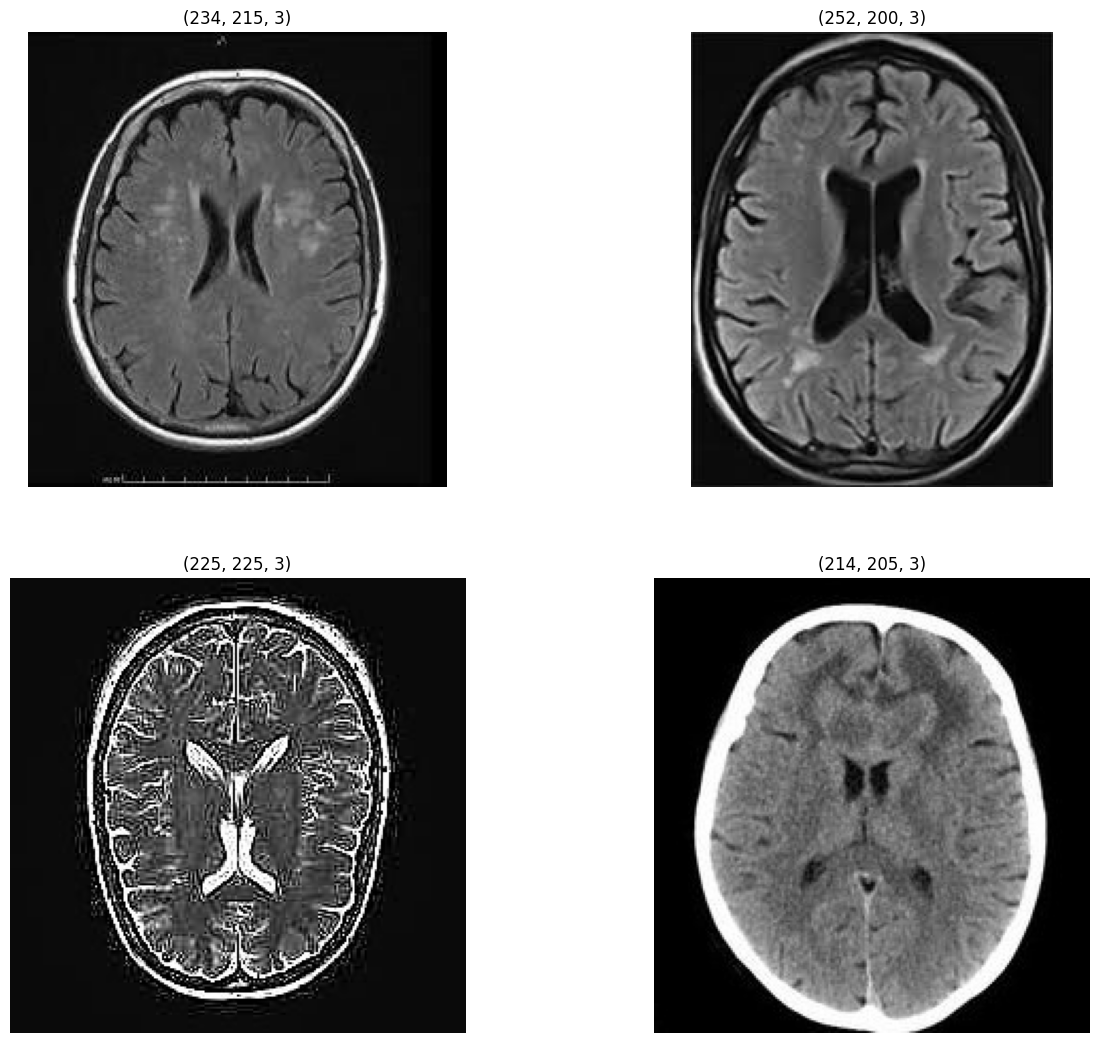

In [8]:
view_random_images("/content/Training/","notumor")

***Let's visualize some images with tumor***

EXECUTION SUCCESSFULL


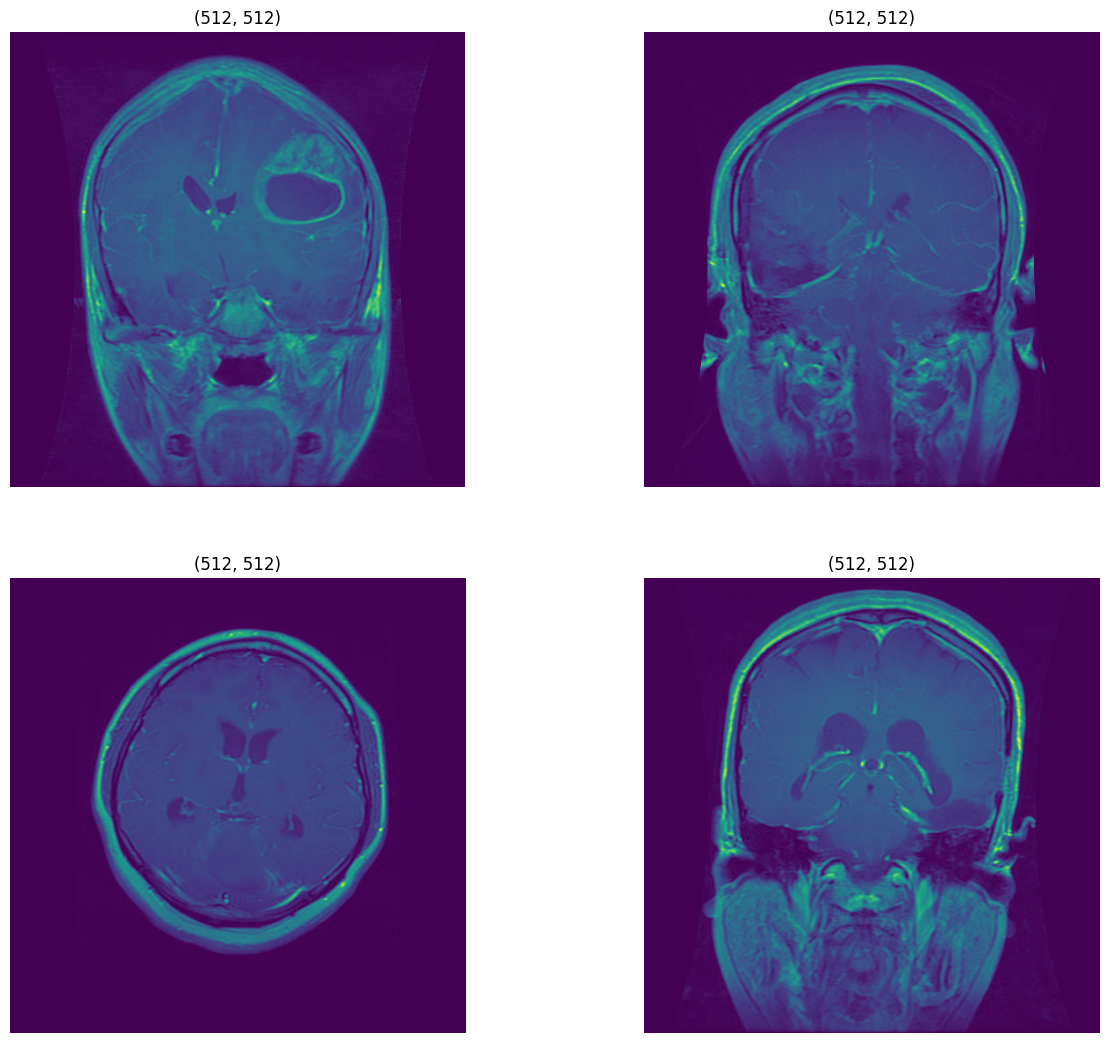

In [9]:
view_random_images("/content/Training/","glioma")

> **`NOTE` - HERE BY NORMAL EYES WE CANNOT FIND MUCH DIFFRENCES, BUT THE CNN MODEL WHICH GOES INTO MINUTE DETAILS WILL BE ABLE TO CLASSIFY**

## ***PREPARING THE DATA***

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/Training"
test_dir = "/content/Testing"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size = (224, 224),
                                               class_mode = "categorical",
                                               seed = 42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size= 32,
                                             target_size = (224, 224),
                                             class_mode = "categorical",
                                             seed = 42)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [11]:
print(f"The length of train_Data = {len(train_data)}")
print(f"The length of test_data = {len(test_data)}")

The length of train_Data = 179
The length of test_data = 41


## ***MODELLING EXPERIMENTS ->***
1. `MODEL 0` - Baseline model, only Conv2D and MaxPool2D layers
2. `MODEL 1` - CNN model with more layers like Dropout, BatchNormalization etc.
3. `MODEL 2` - CNN model with data augmentation
4. `MODEL 3` - Tensorflow Hub model

## ***MODEL 0 --> MAKING THE BASELINE MODEL***
Let's now make our baseline model, a simple CNN model with only Conv2D and MaxPool2D layers

In [12]:
import tensorflow as tf

# Setting the random seed for reproducability
tf.random.set_seed(42)

# The model 0 -
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = (2, 2),
                           strides = (1, 1),
                           padding = "same",
                           input_shape = (224, 224, 3),
                           activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
    tf.keras.layers.Conv2D(10,(2, 2), activation = "relu"),
    tf.keras.layers.Conv2D(10,(2, 2), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
    tf.keras.layers.Conv2D(10,(2, 2), activation = "relu"),
    tf.keras.layers.Conv2D(10,(2, 2), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = "softmax")
])

# Compilng the model
model_0.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fitting in the model
history_0 = model_0.fit(x = train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
179/179 [==============================] - 29s 91ms/step - loss: 0.8588 - accuracy: 0.6217 - val_loss: 0.8624 - val_accuracy: 0.7162
Epoch 2/10
179/179 [==============================] - 16s 87ms/step - loss: 0.5369 - accuracy: 0.8030 - val_loss: 0.6373 - val_accuracy: 0.7422
Epoch 3/10
179/179 [==============================] - 16s 88ms/step - loss: 0.4716 - accuracy: 0.8214 - val_loss: 0.5413 - val_accuracy: 0.7849
Epoch 4/10
179/179 [==============================] - 17s 96ms/step - loss: 0.4099 - accuracy: 0.8491 - val_loss: 0.5366 - val_accuracy: 0.8093
Epoch 5/10
179/179 [==============================] - 16s 88ms/step - loss: 0.3747 - accuracy: 0.8685 - val_loss: 0.5535 - val_accuracy: 0.8032
Epoch 6/10
179/179 [==============================] - 16s 88ms/step - loss: 0.3418 - accuracy: 0.8808 - val_loss: 0.4585 - val_accuracy: 0.8230
Epoch 7/10
179/179 [==============================] - 16s 92ms/step - loss: 0.3025 - accuracy: 0.8925 - val_loss: 0.3998 - val_accuracy:

#### ***HELPER FUNCTION 2 - PLOT THE EVALUATION CURVES FOR MODELS***

> ***WHAT ARE LOSS CURVES ?***
--> Loss curves give us the insights about the performance of the model.


`loss`
* Decresing loss is a good sign
* Decreasing training loss and increasing validation loss means overfitting
* All losses increasing means bad performances
* maxima or minima means the model reached its max capacity
* both losses going together means model is success


`accuracy`
* Increasing accuracy means success
* decresing accuracy means model does not perform well
* Decreasing training accuracy, increasing validation accuracy or vice versa --> overfitting
* maxima minima means model has reached its max capacity
* high training accuracy low val accuracy --> ovrefitting

In [13]:
def eval_curves(history):
  training_loss = history.history["loss"]
  training_accuracy = history.history["accuracy"]
  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(1, len(training_accuracy) + 1 )

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, training_loss, label="Training Loss")
  plt.plot(epochs, val_loss, label="Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Training and Validation Loss")
  plt.legend()

  # Plot training and validation accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, training_accuracy, label="Training Accuracy")
  plt.plot(epochs, val_accuracy, label="Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training and Validation Accuracy")
  plt.legend()

  plt.tight_layout()
  plt.show()

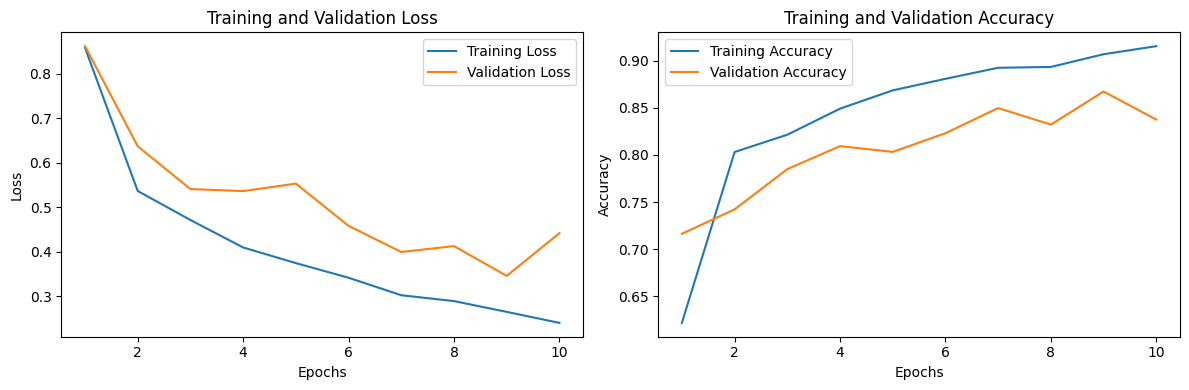

In [14]:
eval_curves(history_0)

In [23]:
model_0_baseline = {
    'accuracy' : 83.75,
    'loss':44.21
}

> ***Our baseline model is performing pretty well. But I once heard from Mrd Bourke (a big ML practitioner) that a machine learner's motto is to build --> evaluate --> test --> build better.  So Let's try to beat our baseline with another modelling experiments***

## ***MODEL 1 --> MORE COMPLEX MODEL***
Let's now try a modelling experiment and beat our baseline. Tho our model is not overfitting, we will add batch normalization and weight regularization to check how our data runs on a more complex model.

In [19]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
     tf.keras.layers.Conv2D(filters = 32, kernel_size = (2, 2), strides = (2, 2),padding = "same", input_shape = (224, 224, 3), activation = "relu"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
     tf.keras.layers.Dropout(0.25),

     tf.keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), strides = (2, 2),padding = "same", activation = "relu"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
     tf.keras.layers.Dropout(0.50),

     tf.keras.layers.Conv2D(filters = 128, kernel_size = (2, 2), strides = (2, 2),padding = "same", activation = "relu"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = None),
     tf.keras.layers.Dropout(0.25),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
     tf.keras.layers.Dropout(0.50),

     tf.keras.layers.Dense(4, activation = "softmax")
])

model_1.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_1 = model_1.fit(x = train_data,
                        epochs = 20,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/20
179/179 [==============================] - 19s 87ms/step - loss: 2.9217 - accuracy: 0.5790 - val_loss: 5.4891 - val_accuracy: 0.2288
Epoch 2/20
179/179 [==============================] - 19s 104ms/step - loss: 1.7701 - accuracy: 0.6879 - val_loss: 2.9922 - val_accuracy: 0.2654
Epoch 3/20
179/179 [==============================] - 16s 89ms/step - loss: 1.2444 - accuracy: 0.7418 - val_loss: 2.0333 - val_accuracy: 0.5187
Epoch 4/20
179/179 [==============================] - 16s 88ms/step - loss: 0.9565 - accuracy: 0.7694 - val_loss: 1.1481 - val_accuracy: 0.6758
Epoch 5/20
179/179 [==============================] - 17s 93ms/step - loss: 0.8236 - accuracy: 0.7868 - val_loss: 0.9099 - val_accuracy: 0.7391
Epoch 6/20
179/179 [==============================] - 16s 91ms/step - loss: 0.7325 - accuracy: 0.8036 - val_loss: 0.9623 - val_accuracy: 0.7315
Epoch 7/20
179/179 [==============================] - 16s 91ms/step - loss: 0.6642 - accuracy: 0.8176 - val_loss: 0.6673 - val_accuracy

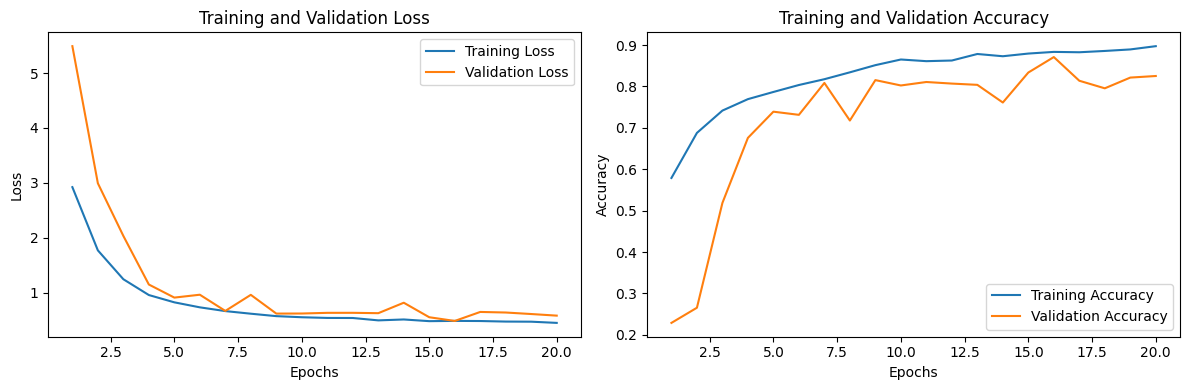

In [20]:
eval_curves(history_1)

In [24]:
model_1_results= {
    'accuracy' : 82.53,
    'loss': 44.93,
}


In [25]:
model_results = {
    'basline_model_0' : model_0_baseline,
    'model_1' : model_1_results
}

model_results

{'basline_model_0': {'accuracy': 83.75, 'loss': 44.21},
 'model_1': {'accuracy': 82.53, 'loss': 44.93}}

> ***Seems like our bsaline model performs better than the model 1 even with half as many iterations and comparitely lower complexity than model 0. Let's Now do another experiment, let's try data augmentation and see what the results look like.***



## ***MODEL 2 --> DATA AUGMENTATION***
> So data augmentation is basically the process of editing the images (not photoshop type of...)  to add more variety to the dataset. Let's augment the images from tf imagedatagenerator library and vidualize them.

In [33]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.5,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,
                                             vertical_flip=False)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True)

Found 5712 images belonging to 4 classes.


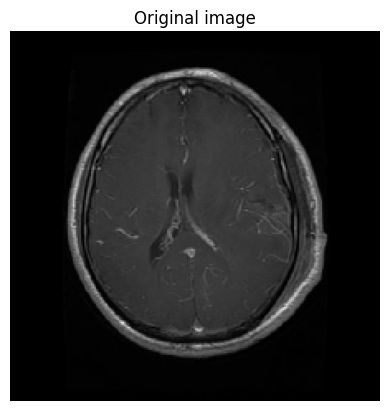

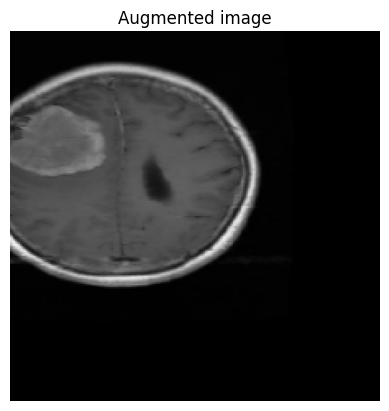

In [34]:
import random

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

**Let's Build a model 2 for these augmented images.**

In [36]:
tf.random.set_seed(42)

model_2_augmented = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (2, 2), strides = (1, 1), padding = "same", input_shape = (224, 224, 3),activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = (2,2 )),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64,(2, 2), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = (2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(10,(2, 2), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid", strides = (2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(4, activation = "softmax")
])


model_2_augmented.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_2 = model_2_augmented.fit(x = train_data_augmented,
                        epochs = 20,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/20
179/179 [==============================] - 82s 434ms/step - loss: 1.2368 - accuracy: 0.3876 - val_loss: 1.1171 - val_accuracy: 0.5645
Epoch 2/20
179/179 [==============================] - 80s 446ms/step - loss: 0.9421 - accuracy: 0.6098 - val_loss: 1.0612 - val_accuracy: 0.5950
Epoch 3/20
179/179 [==============================] - 81s 451ms/step - loss: 0.7875 - accuracy: 0.6840 - val_loss: 0.8003 - val_accuracy: 0.7079
Epoch 4/20
179/179 [==============================] - 77s 431ms/step - loss: 0.7383 - accuracy: 0.7110 - val_loss: 0.7334 - val_accuracy: 0.7254
Epoch 5/20
179/179 [==============================] - 77s 431ms/step - loss: 0.7089 - accuracy: 0.7159 - val_loss: 0.8300 - val_accuracy: 0.6629
Epoch 6/20
179/179 [==============================] - 76s 427ms/step - loss: 0.6803 - accuracy: 0.7309 - val_loss: 0.9747 - val_accuracy: 0.6186
Epoch 7/20
179/179 [==============================] - 84s 471ms/step - loss: 0.6584 - accuracy: 0.7407 - val_loss: 0.7951 - val_ac

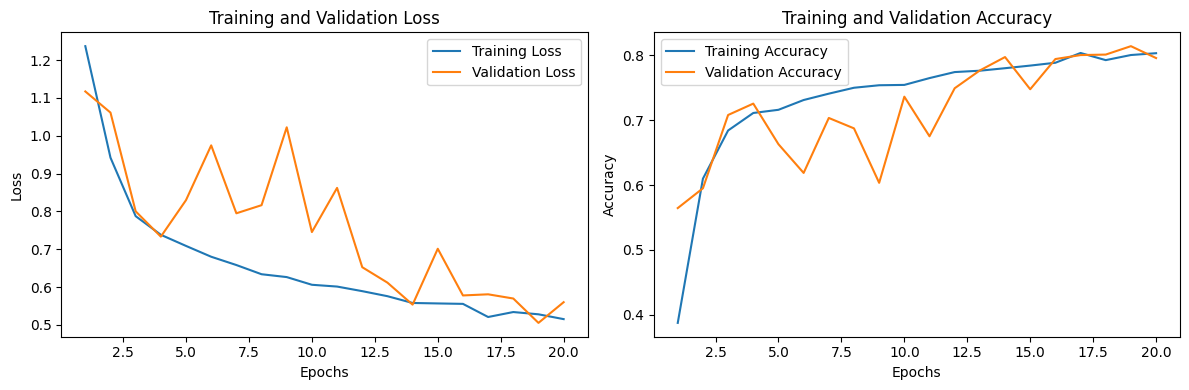

In [37]:
eval_curves(history_2)

In [55]:
model_2_results= {
    'accuracy' : 79.56 ,
    'loss': 56.02,
}
model_2_results

{'accuracy': 79.56, 'loss': 56.02}

> ***This model also nearly touches the predictions of baseline model. Let's Try another machine learning experiment, using 'TRANSFER LEARNING'***

## ***MODEL 3,4 - TRANSFER LEARNING***
> So Transfer learning is the proces of leveraging pre-trained models for our use case. The pre-trained models are created by the big data science and ml companies which have smart men to produce good outcomes. Those models are a result of great calculations and experiments.


> Using These pre-trained model can give us better results than the normal Sequential Models. So let's start.

#### ***HELPER FUNCTION 3 --> CREATE TENSORBOARD CALLBACKS***

In [39]:
# Create a tensorboard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

'''
CALLBACKS are functionality we can add to our models which occur during
training. Like adding checkpoints to get the points where the performances of
model peaked or to get the point performances of the model throughout.
'''

'\nCALLBACKS are functionality we can add to our models which occur during \ntraining. Like adding checkpoints to get the points where the performances of \nmodel peaked or to get the point performances of the model throughout.\n'

`EfficientNet - ` a state of the art computer vision architecture from 2019. It helps achieve better results than the conv models.
* It has over 236 layers

In [40]:
import tensorflow as tf
import tensorflow_hub as hub

In [41]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [42]:
def create_model(model_url, num_classes=4, IMAGE_SHAPE=(224, 224)):
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    tf.keras.layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [44]:
efficient_net_model = create_model(efficientnet_url, num_classes=4)

efficient_net_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

efficient_net_history = efficient_net_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tf_hub_models",
                                                                         experiment_name="efficient_net")])

Saving TensorBoard log files to: tf_hub_models/efficient_net/20231008-155950
Epoch 1/10
179/179 [==============================] - 31s 120ms/step - loss: 0.5740 - accuracy: 0.7990 - val_loss: 0.4510 - val_accuracy: 0.8391
Epoch 2/10
179/179 [==============================] - 18s 101ms/step - loss: 0.3347 - accuracy: 0.8887 - val_loss: 0.3669 - val_accuracy: 0.8627
Epoch 3/10
179/179 [==============================] - 18s 99ms/step - loss: 0.2765 - accuracy: 0.9074 - val_loss: 0.3142 - val_accuracy: 0.8757
Epoch 4/10
179/179 [==============================] - 18s 99ms/step - loss: 0.2446 - accuracy: 0.9191 - val_loss: 0.2904 - val_accuracy: 0.8863
Epoch 5/10
179/179 [==============================] - 17s 97ms/step - loss: 0.2217 - accuracy: 0.9254 - val_loss: 0.2714 - val_accuracy: 0.8947
Epoch 6/10
179/179 [==============================] - 18s 101ms/step - loss: 0.2050 - accuracy: 0.9315 - val_loss: 0.2633 - val_accuracy: 0.8993
Epoch 7/10
179/179 [==============================] - 20

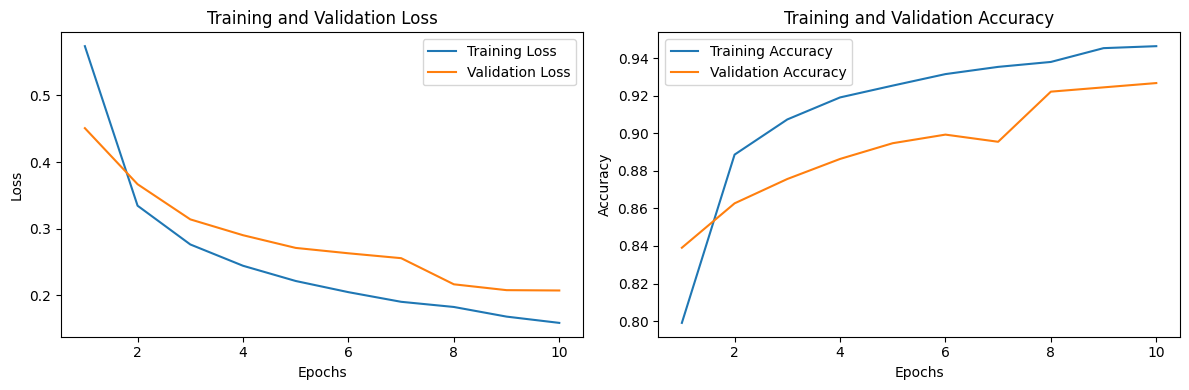

In [45]:
eval_curves(efficient_net_history)

In [51]:
efficient_net_results= {
    'accuracy' : 92.68 ,
    'loss': 20.75,
}

> ***As we were expecting, the efficientnet model runs very nicely and beats all the models with a very fine margins. Let's try another tf hub model before running predictions***

`RESNET_MODEL - ` has over 50-200 layers ranging on the version

In [49]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

resnet_model = create_model(resnet_url, num_classes=4)

resnet_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

resnet_history = resnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tf_hub_models",
                                                                         experiment_name="resnet_net")])

Saving TensorBoard log files to: tf_hub_models/resnet_net/20231008-160751
Epoch 1/10
179/179 [==============================] - 39s 159ms/step - loss: 0.5482 - accuracy: 0.7908 - val_loss: 0.4085 - val_accuracy: 0.8375
Epoch 2/10
179/179 [==============================] - 20s 114ms/step - loss: 0.2814 - accuracy: 0.9006 - val_loss: 0.3211 - val_accuracy: 0.8734
Epoch 3/10
179/179 [==============================] - 20s 111ms/step - loss: 0.2181 - accuracy: 0.9266 - val_loss: 0.2739 - val_accuracy: 0.8970
Epoch 4/10
179/179 [==============================] - 20s 112ms/step - loss: 0.1867 - accuracy: 0.9361 - val_loss: 0.2709 - val_accuracy: 0.9054
Epoch 5/10
179/179 [==============================] - 20s 112ms/step - loss: 0.1603 - accuracy: 0.9452 - val_loss: 0.2238 - val_accuracy: 0.9207
Epoch 6/10
179/179 [==============================] - 20s 113ms/step - loss: 0.1402 - accuracy: 0.9561 - val_loss: 0.2064 - val_accuracy: 0.9298
Epoch 7/10
179/179 [==============================] - 20

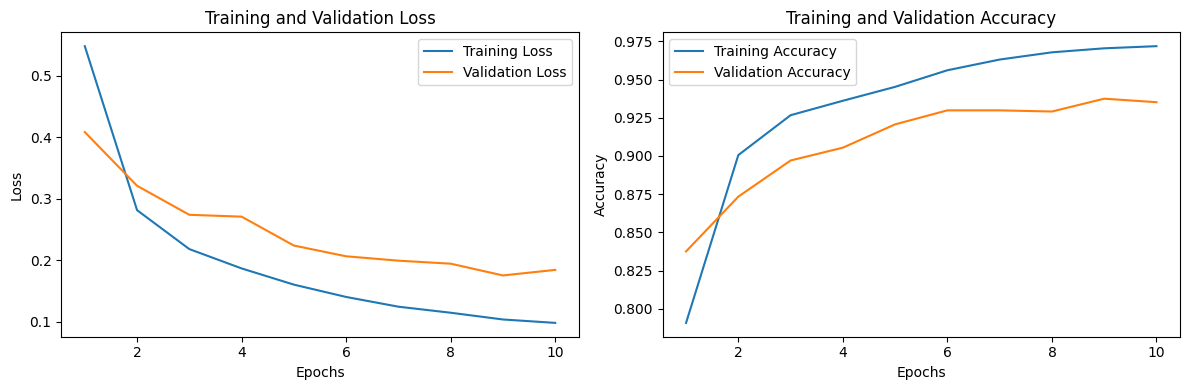

In [50]:
eval_curves(resnet_history)

In [53]:
resnet_results= {
    'accuracy' : 93.52 ,
    'loss': 18.43,
}

> ***This model also gives us satisfactory results as we wanted.***

## ***COMPARING THE RESULTS***

In [57]:
all_model_results = {
    'baseline_model_0' : model_0_baseline,
    'model_1' : model_1_results,
    'model_2 - augmented' : model_2_results,
    'efficient_net_model' : efficient_net_results,
    'reset_model' : resnet_results

}
all_model_results

{'baseline_model_0': {'accuracy': 83.75, 'loss': 44.21},
 'model_1': {'accuracy': 82.53, 'loss': 44.93},
 'model_2 - augmented': {'accuracy': 79.56, 'loss': 56.02},
 'efficient_net_model': {'accuracy': 92.68, 'loss': 20.75},
 'reset_model': {'accuracy': 93.52, 'loss': 18.43}}

In [60]:
import pandas as pd
all_model_results_df = pd.DataFrame(all_model_results)
all_model_results_df = all_model_results_df.transpose()
all_model_results_df

,accuracy,loss
baseline_model_0,83.75,44.21
model_1,82.53,44.93
model_2 - augmented,79.56,56.02
efficient_net_model,92.68,20.75
reset_model,93.52,18.43


In [61]:
all_model_results_df["accuracy"] =  all_model_results_df["accuracy"]/100
all_model_results_df["loss"] =  all_model_results_df["loss"]/100

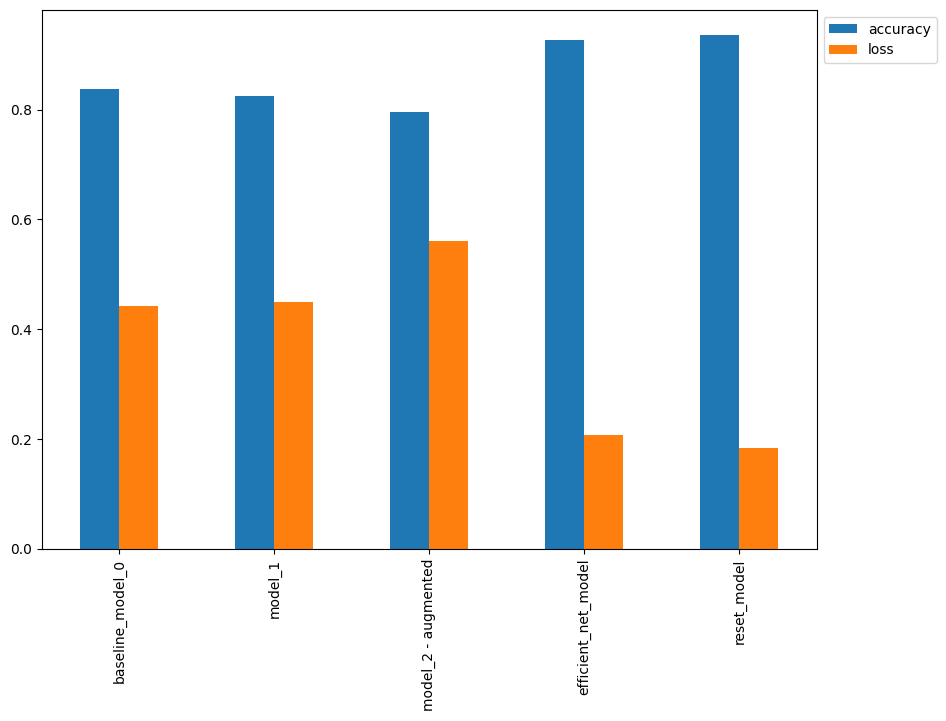

In [63]:
# Plot and compare all of the model results
all_model_results_df.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

## ***SAVING MODELS AND MAKING PREDICTIONS***

In [65]:
model_0.save('model_0_baseline.keras')
model_1.save('model_1.baseline.keras')
model_2_augmented.save('model_2_augmented.keras')
efficient_net_model.save('efficient_net_model.keras')
resnet_model.save('resnet_model.keras')